# Abstract
Chronic kidney disease includes conditions that damage your kidneys and decrease their ability to keep you healthy by filtering wastes from your blood. If kidney disease worsens, wastes can build to high levels in your blood and make you feel sick.

Given 24 health related attributes taken in 2-month period of 400 patients, using the information of the 158 patients with complete records to predict the outcome (i.e. whether one has chronic kidney disease) of the remaining 242 patients (with missing values in their records).


In [1]:
# Making the necessary imports
import numpy as np
import pandas as pd
import os, sys
import lux
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

# Insuring the notebook's graphs are seaborn standard
sns.set()

In [2]:
# Loading the dataset into a dataframe
df = pd.read_csv('kidney_disease.csv')
df.head(n=10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [3]:
# Checking the shape of the dataset
df.shape

(400, 26)

In [4]:
# Finding the null values in the dataset

df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [5]:
# Imputing the null values (Replacing the missing or null values with a particular value in the entire dataset)
from sklearn.impute import SimpleImputer

# Imputing the null values with the mode of the column
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

df_imputed=pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns=df.columns
df_imputed

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [6]:
# Checking if there are any null values left over after imputing the null values
df_imputed.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


In [7]:
# Finding the unique values in the columns

for i in df_imputed.columns:
    print(i)
    print()
    # Converting the dataframe object to a list then turning that list into a set
    print(set(df_imputed[i].tolist()))
    print()

id

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 

In [8]:
# Checking the mode values for numerical columns which had typo values within them in the previous cell
print(df_imputed['rc'].mode())
print(df_imputed['wc'].mode())
print(df_imputed['pcv'].mode())

0    5.2
dtype: object
0    9800
dtype: object
0    41
dtype: object


In [9]:
# Replacing typo values with the actual values in the columns with typo errors using lambda functions
df_imputed["classification"]=df_imputed["classification"].apply(lambda x:'ckd' if x=="ckd\t"  else x)

df_imputed["cad"]=df_imputed["cad"].apply(lambda x:'no' if x=="\tno"  else x)

df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'no' if x=="\tno"  else x)
df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'yes' if x=="\tyes"  else x)
df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'yes' if x==' yes'  else x)

df_imputed["rc"]=df_imputed["rc"].apply(lambda x:'5.2' if x=='\t?'  else x)

df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x=='\t6200'  else x)
df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x=='\t8400'  else x)
df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x== '\t?'  else x)

df_imputed["pcv"]=df_imputed["pcv"].apply(lambda x:'41' if x=='\t43'  else x)
df_imputed["pcv"]=df_imputed["pcv"].apply(lambda x:'41' if x== '\t?'  else x)






In [10]:
# Finding the unique values in the columns within the corrected dataset to make sure typo errors are removed

for i in df_imputed.columns:
    print(i)
    print()
    print(set(df_imputed[i].tolist()))
    print()

id

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 

AxesSubplot(0.125,0.11;0.775x0.77)


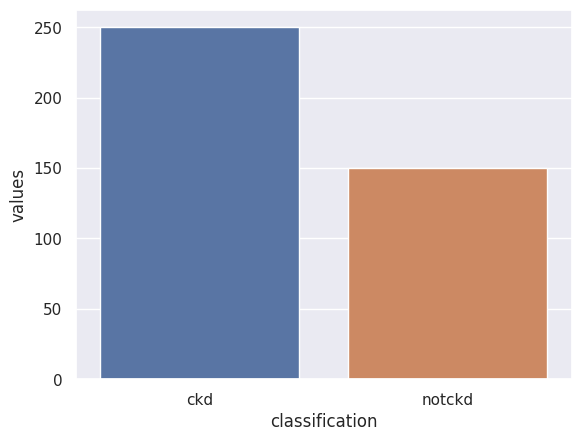

In [11]:
# Checking for label imbalance 
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a temporary dataframe to check how many times a particular value/class has occured
temp=df_imputed["classification"].value_counts()
temp_df= pd.DataFrame({'classification': temp.index,'values': temp.values})
print(sns.barplot(x = 'classification', y="values", data=temp_df))

In [12]:
# Checking the data types of the main dataframe
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [13]:
# Checking the data types of the fixed dataframe
df_imputed.dtypes

id                object
age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object


In [14]:
# Selecting the columns from the main dataframe that are not objects
for i in df.select_dtypes(exclude=["object"]).columns:
    # Converting the values to floats
    df_imputed[i]=df_imputed[i].apply(lambda x: float(x))

In [15]:
# Checking the data types of the corrected imputed dataframe
df_imputed.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


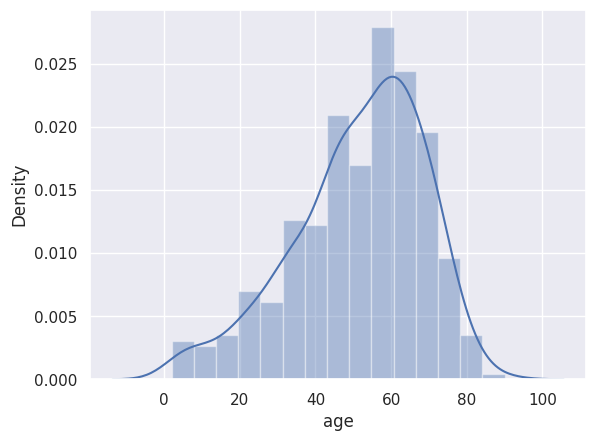

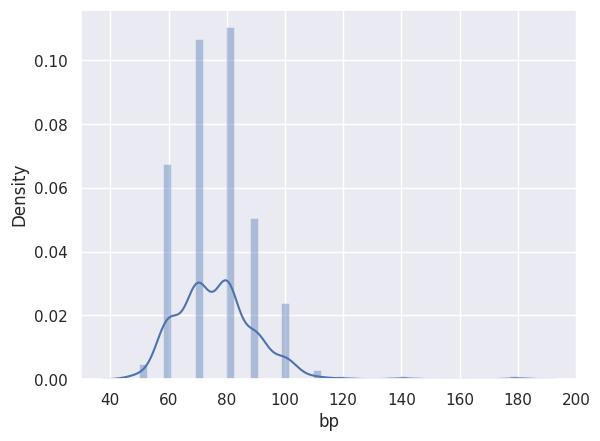

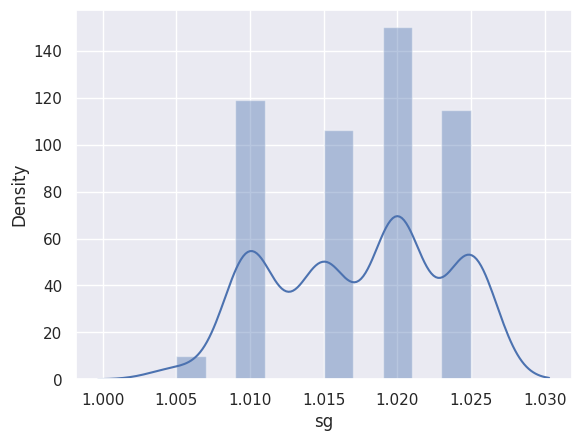

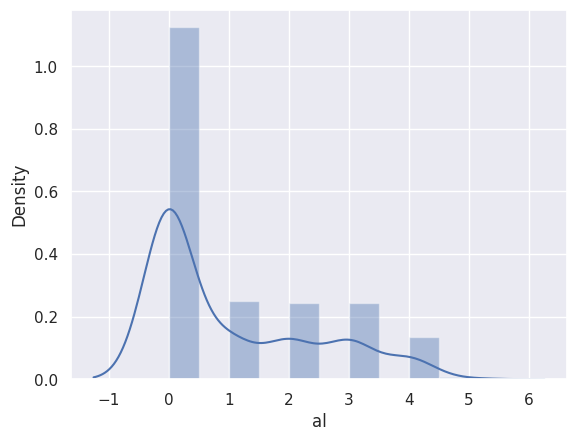

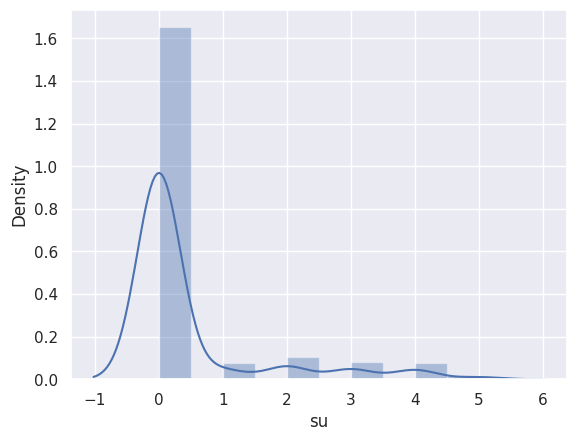

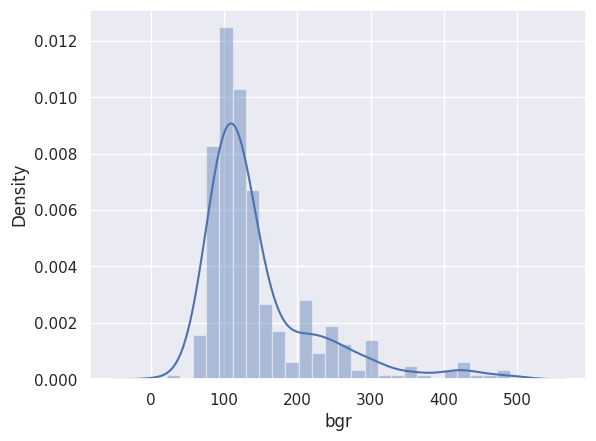

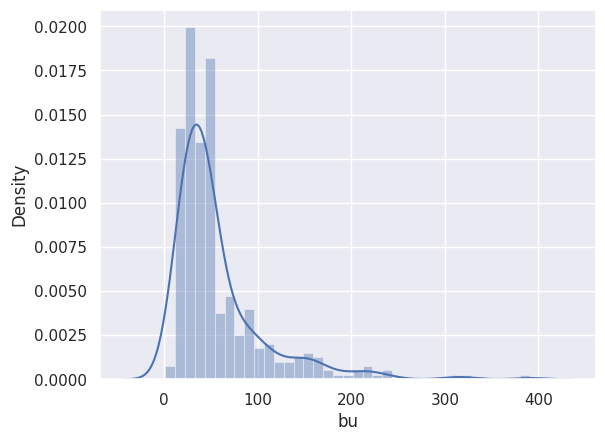

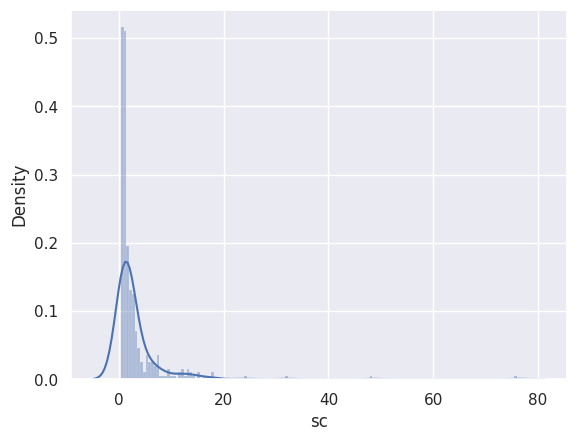

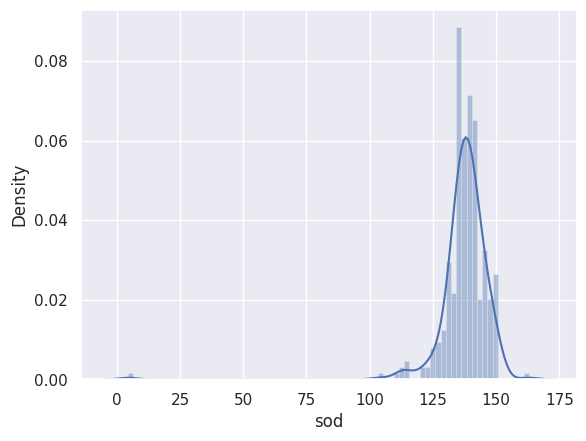

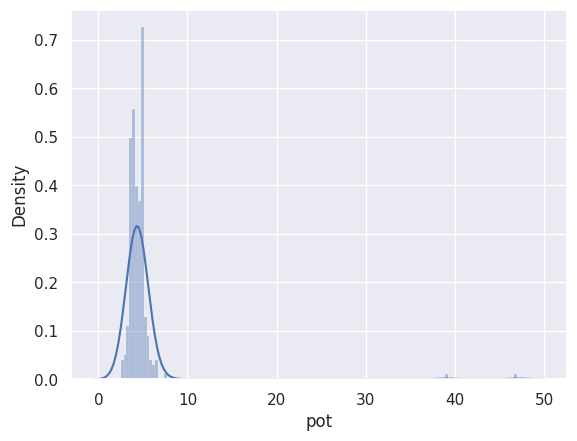

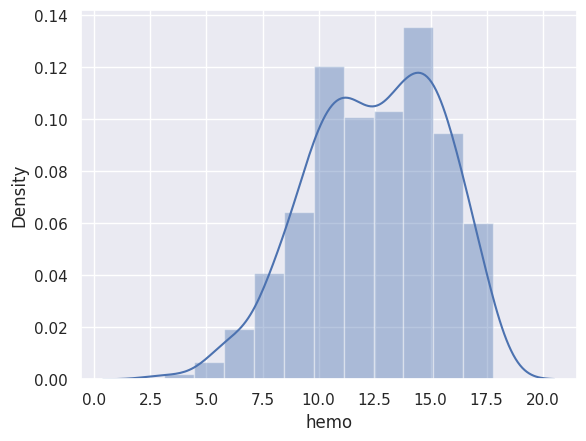

In [16]:
# Finding the distribution of the data and making sure it follows a normal distribution (ell curve)
def distplots(col):
    sns.histplot(
    df[col], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)
    plt.show()
    
# Looping through each column except for object data types
for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
    distplots(i)

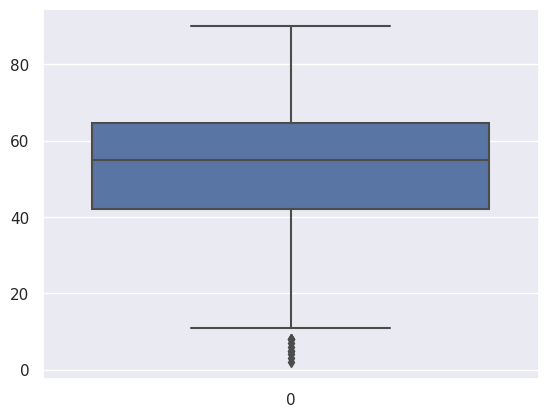

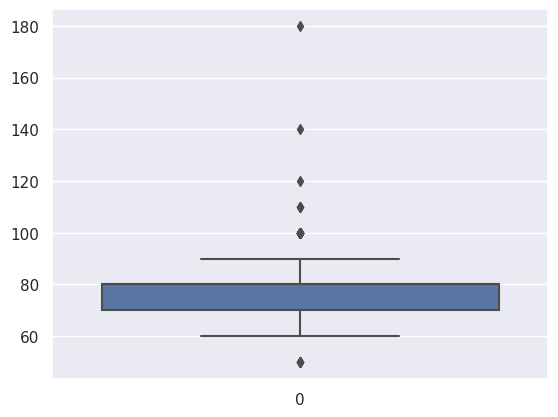

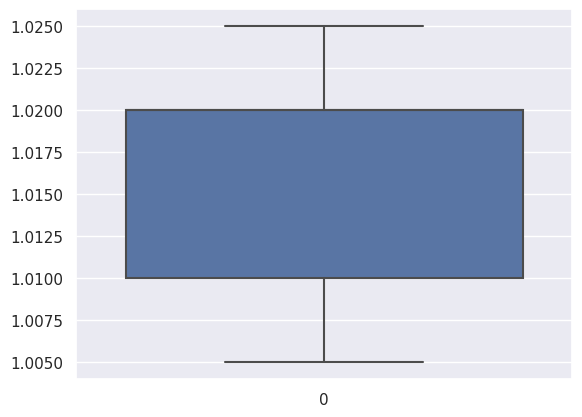

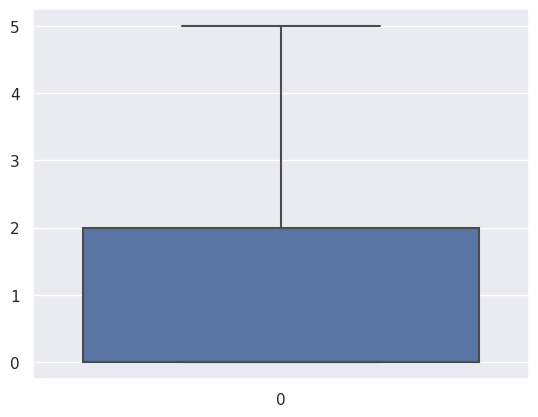

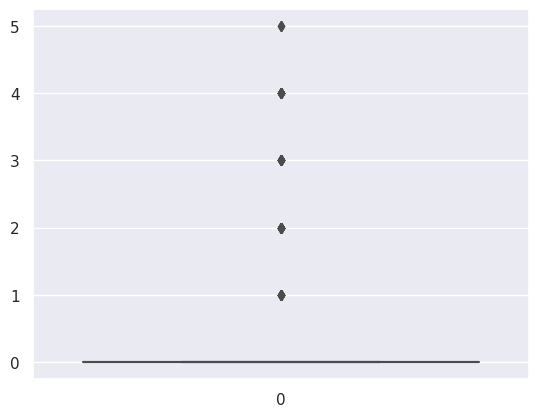

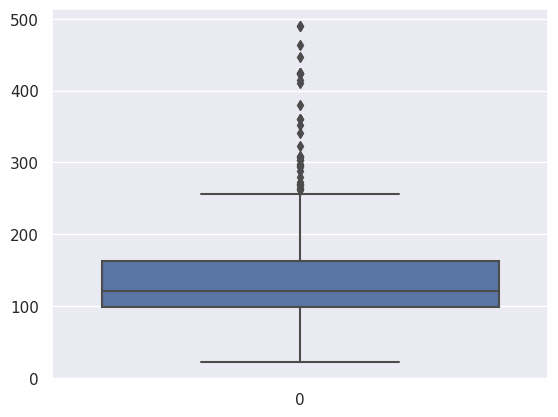

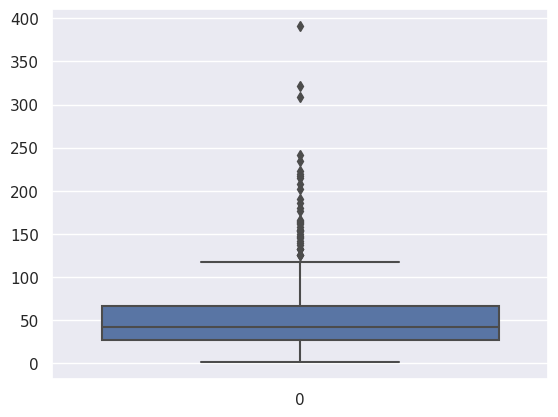

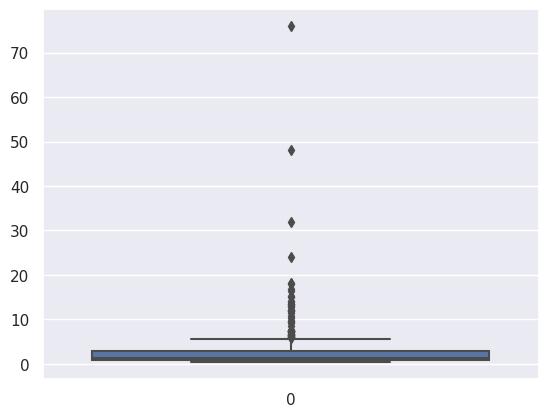

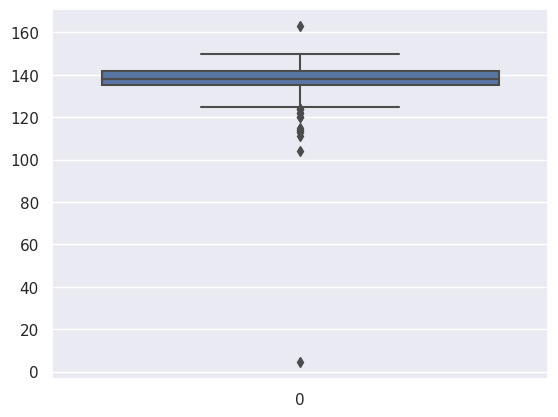

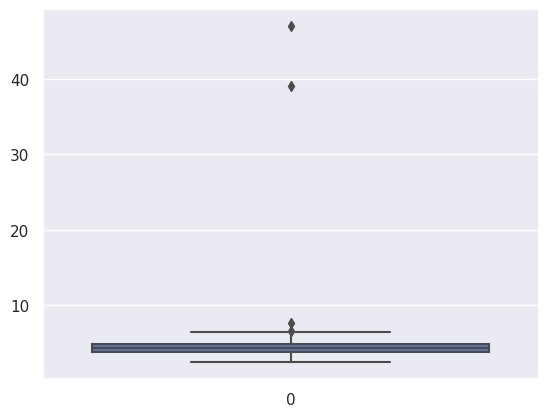

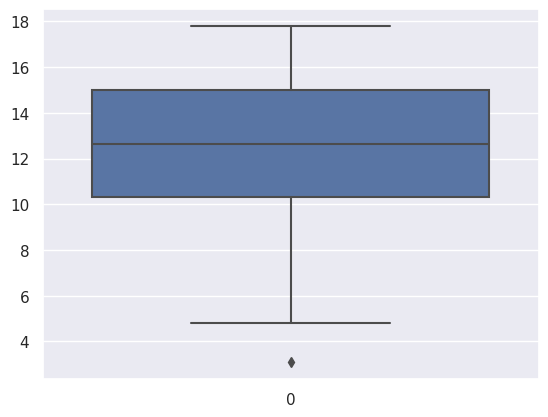

In [17]:
# Finding the outliers within the data using boxplots
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
    boxplots(i)

In [18]:
# Labeling encoding to convert categorical values to numerical values since the algorithm will use numerical values (replacing checked with 1 and unchecked with 0)
from sklearn import preprocessing

# Applying preprocessing to the entire dataframe
df_enco=df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df_enco

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,3,3,1,0,1,1,0,0,...,30,69,33,1,1,0,0,0,0,0
1,1,5,0,3,4,0,1,1,0,0,...,24,53,33,0,0,0,0,0,0,0
2,2,54,3,1,2,3,1,1,0,0,...,17,67,33,0,1,0,1,0,1,0
3,3,40,2,0,4,0,1,0,1,0,...,18,59,18,1,0,0,1,1,1,0
4,4,43,3,1,2,0,1,1,0,0,...,21,65,26,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,3,3,0,0,1,1,0,0,...,33,59,29,0,0,0,0,0,0,1
396,396,34,2,4,0,0,1,1,0,0,...,40,69,43,0,0,0,0,0,0,1
397,397,8,3,3,0,0,1,1,0,0,...,35,58,35,0,0,0,0,0,0,1
398,398,11,1,4,0,0,1,1,0,0,...,37,64,40,0,0,0,0,0,0,1


In [19]:
# Saving the preprocessed dataframe as a .csv file
df_enco.to_csv("Kidney_Disease_Pre-Processed.csv")

<AxesSubplot: >

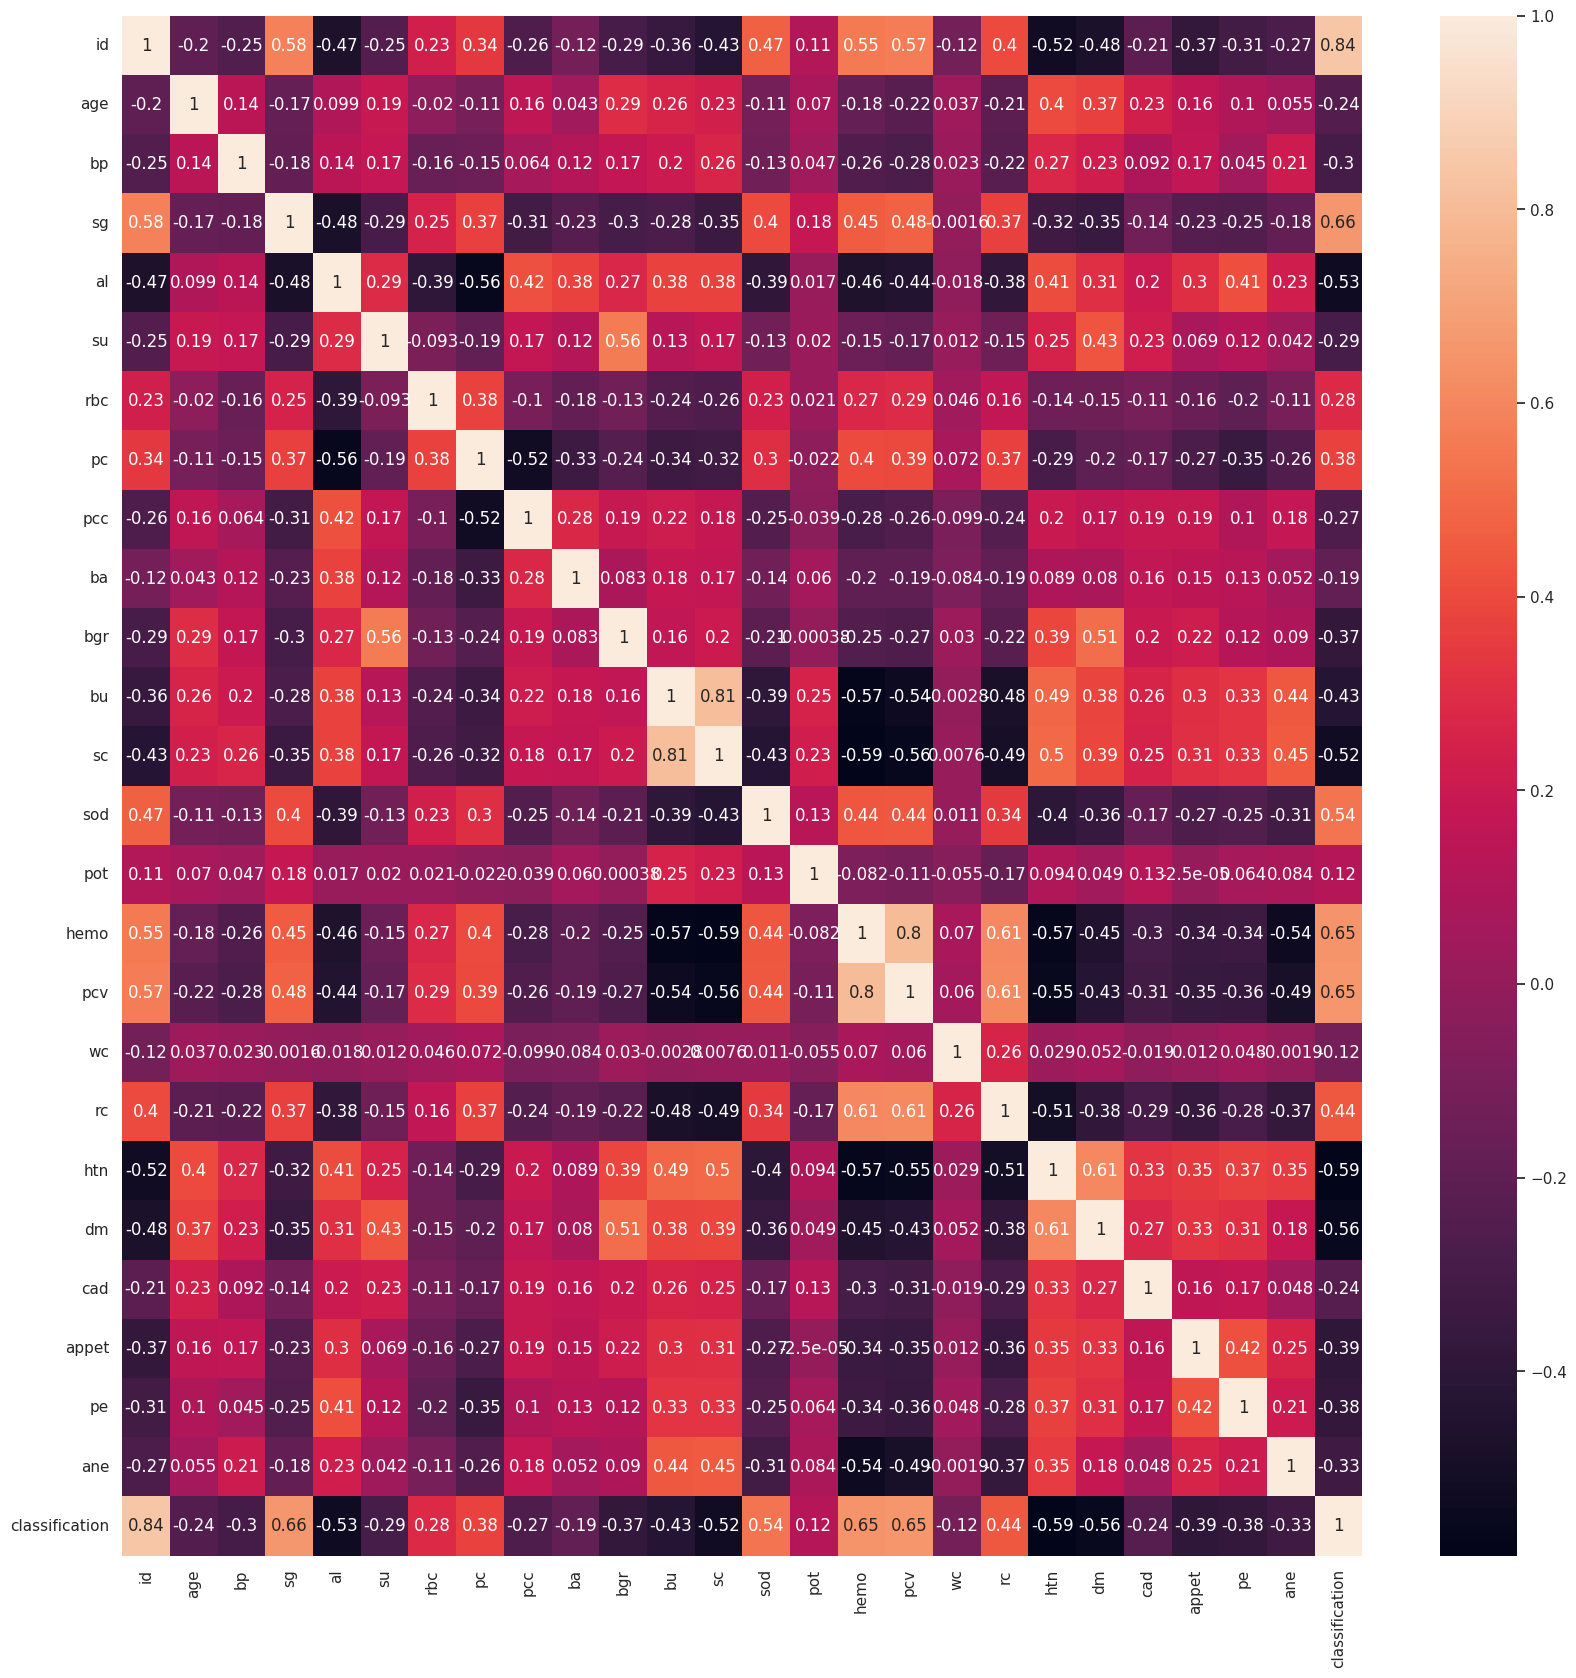

In [20]:
# Finding the correlations between the variables using a heatmap
# High correlations between two independent variables will cause issues
plt.figure(figsize=(20,20))
corr=df_enco.corr()
sns.heatmap(corr,annot=True)

In [21]:
# Seperating the independent and dependent variables and dropping the ID column
x=df_enco.drop(["id","classification"],axis=1)
y=df_enco["classification"]

In [22]:
# Checking the label imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print(Counter(y))

Counter({0: 250, 1: 150})


In [23]:
# Balancing the imbalanced labels using oversampling to preserve data
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(x, y)

# Checking for label imbalance
print(Counter(y_ros))

Counter({0: 250, 1: 250})


In [24]:
# Scaling using the MinMaxScaler to ensure there is no overfit when fitting data into the model
#.fit_transforms() fits to the data and transforms it.
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(X_ros)
y=y_ros

In [25]:
# Applying PCA (Principal Component Analysis) to choose the minimum number of principal components, so there is 95% of the variance.
# This allows for data to be represented as a smaller set of variables, so trends, clusters, outliers, etc. can be seen
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_PCA = pca.fit_transform(x)

# Checking that PCA has reduced to a smaller set of variables that preserve 95% of the variance.
print(x.shape)
print(X_PCA.shape)

(500, 24)
(500, 18)


In [26]:
# Splitting the dataset into the training and testing datasets while preserving 20% of the data for testing and 80% of the data for training
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_PCA, y, test_size=0.2, random_state=7)

In [27]:
import keras
# Importing a sequential model for layers connected to the next (one input tensor and one output tensor), so there isn't feedback, etc. from the layers
from keras.models import Sequential

#  Importing the dense deeply connected neural network layer to make sure no feedback, etc. is taken
from keras.layers import Dense

# Importing a dropout layer to randomly set input units to 0 and a frequency of rate at each step (cuts off the connection between a certain number of neurons) to help prevent overfitting. 
from keras.layers import Dropout

# Importing Adam optimization to update network weights efficiently and changing attributes of the neural network to reduce losses 
from keras.optimizers import Adam

2023-01-03 01:06:47.792311: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-03 01:06:47.960491: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-03 01:06:47.965435: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-03 01:06:47.965450: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [28]:
# Creating the model
def model():
    # Using a sequential model
    classifier = Sequential()
    # Creating a dense input layer with a depth of 15 and the number of neurons equal to the number of attributes fed into the model
    classifier.add(Dense(15, input_shape = (x_train.shape[1],), activation = 'relu'))
    # Adding a dropout layer with a frequency of rate of 0.2 (carries 80% of the neurons to the next layer)
    classifier.add(Dropout(0.2))
    # Adding a rectified linear activation function to output the input directly if it is positive or output zero
    # This layer has a depth of 15
    classifier.add(Dense(15, activation = 'relu'))
    # Adding a dropout layer with a frequency of rate of 0.4 (carries 60% of the neurons to the next layer)
    classifier.add(Dropout(0.4))
    # Creating a final layer with a depth of 1 and an activation of sigmoid since detection of Chronic Kidney Disease is a binary classification problem
    classifier.add(Dense(1, activation = 'sigmoid'))
    # Compiling the model with Adam optimization and setting the metrics used for evaluation during backpropogation (an algorithm which tests for errors working back from output nodes to input nodes) as accuracy
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [29]:
# Creating the model by calling the model function from the previous cell 
model = model()
# Generating a model summary that states the layer type, the output shape for the layer, and the  number of paramaters being trained in the layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                285       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________
2023-01-03 01:06:51.470538: W tensorflow/stream_executor/p

In [30]:
# Generating the history of the training of the model that trains with training data then tests with the validation data in each epoch, giving the accuracy values 
# Checking for overfitting by making sure the validation accuracy is not decreasing as the accuracy is increasing
history = model.fit(x_train,y_train,validation_data = (x_test, y_test),epochs = 10,verbose = 1)                                      

Epoch 1/10
13/13 [==============================] - 1s 23ms/step - loss: 0.6257 - accuracy: 0.6925 - val_loss: 0.5970 - val_accuracy: 0.8500
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.5993 - accuracy: 0.7225 - val_loss: 0.5582 - val_accuracy: 0.9200
Epoch 3/10
13/13 [==============================] - 0s 9ms/step - loss: 0.5572 - accuracy: 0.8175 - val_loss: 0.5199 - val_accuracy: 0.9400
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.5269 - accuracy: 0.8625 - val_loss: 0.4793 - val_accuracy: 0.9600
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.4899 - accuracy: 0.8525 - val_loss: 0.4388 - val_accuracy: 0.9700
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4518 - accuracy: 0.8775 - val_loss: 0.3991 - val_accuracy: 0.9700
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.4017 - accuracy: 0.9075 - val_loss: 0.3609 - val_accuracy: 0.9700
Epoch 8/10
13/13 [=

In [31]:
# Importing the necessary components to create an ROC Curve and Precision/Recall Curve
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score, plot_precision_recall_curve, f1_score, confusion_matrix


# Creating a function to plot the ROC Curve to check the true positive to false negative rate and make sure the model is appropriate
def plot_auc(t_y, p_y):
    # fpr = False Positive Rate, tpr = True Positive Rate
    fpr, tpr, thresholds = roc_curve(t_y, p_y, pos_label=1)
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % ('classification', auc(fpr, tpr)))
    c_ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    c_ax.legend()
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')

# Creating a function to plot the Precision/Recall Curve Precision, recall, and thresholds are used.
def plot_precision_recall_curve_helper(t_y, p_y):
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    precision, recall, thresholds = precision_recall_curve(t_y, p_y, pos_label=1)
    aps = average_precision_score(t_y, p_y)
    c_ax.plot(recall, precision, label = '%s (AP Score:%0.2f)'  % ('classification', aps))
    c_ax.plot(recall, precision, color='red', lw=2)
    c_ax.legend()
    c_ax.set_xlabel('Recall')
    c_ax.set_ylabel('Precision')
    

# Creating a function to plot the history of the model, the validation accuracy, and the losses
def plot_history(history):
    f = plt.figure()
    f.set_figwidth(15)
    f.add_subplot(1, 2, 1)
    # Plotting the validation loss
    plt.plot(history.history['val_loss'], label='val loss')
    # Plotting the training loss
    plt.plot(history.history['loss'], label='train loss')
    plt.legend()
    plt.title("Model Loss")
    f.add_subplot(1, 2, 2)
    # Plotting the validation accuracy
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    # Plotting the training loss
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.legend()
    plt.title("Model Accuracy")
    plt.show()

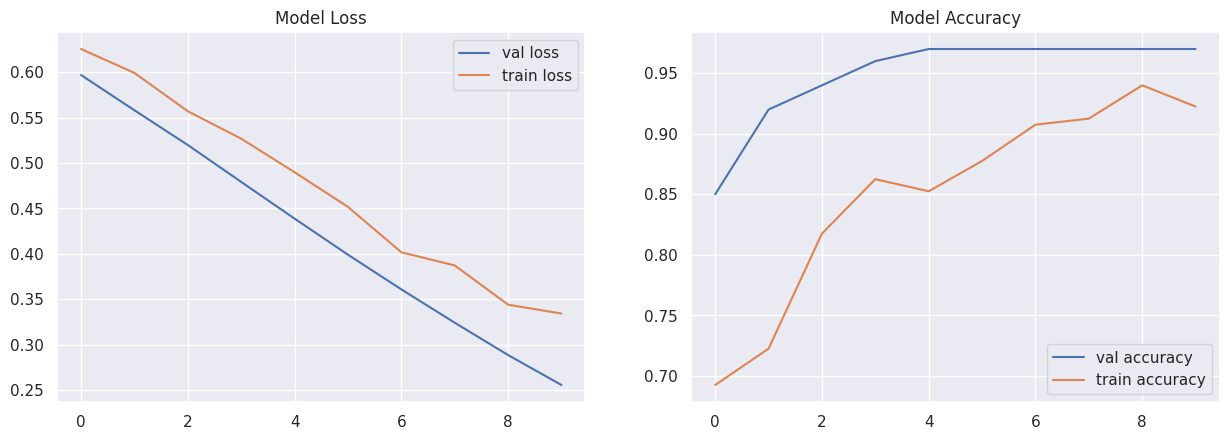

In [32]:
# Calling the plot_history function from the previous cell to create graphs of model loss and model accuracy to make sure overfitting doesn't occur 
# Overfitting happens when the training accuracy is increasing, but the validation accuracy is decreasing; overfitting can also occur if the training loss is decreasing, but the validation loss is increasing
hist = plot_history(history)

4/4 [==============================] - 0s 1ms/step


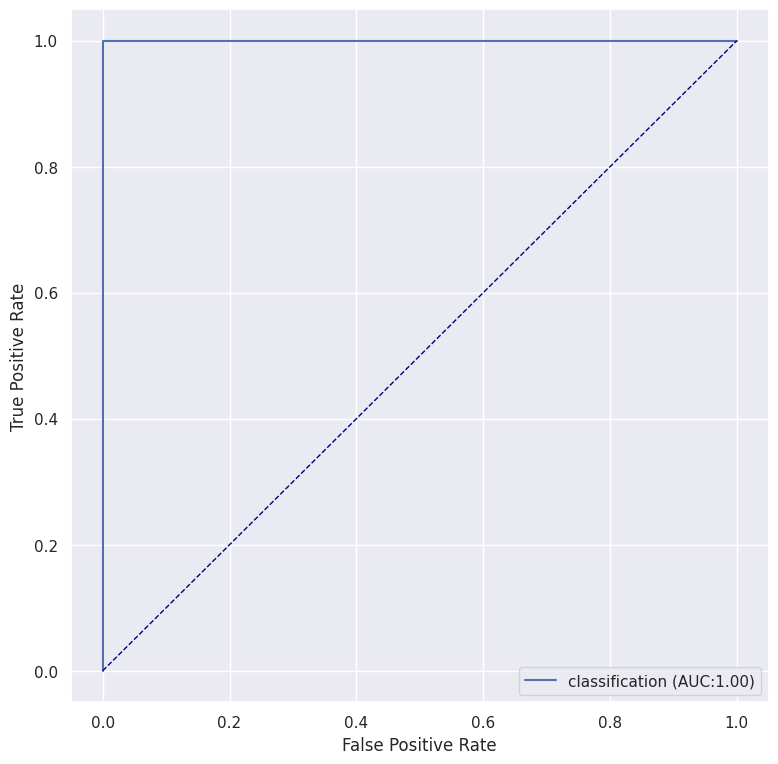

In [33]:
# Creating an ROC Curve using the ROC curve-generating function
# The closer the AUC is to 1, the better the model
plot_auc(y_test, model.predict(x_test, verbose = True))

4/4 [==============================] - 0s 4ms/step


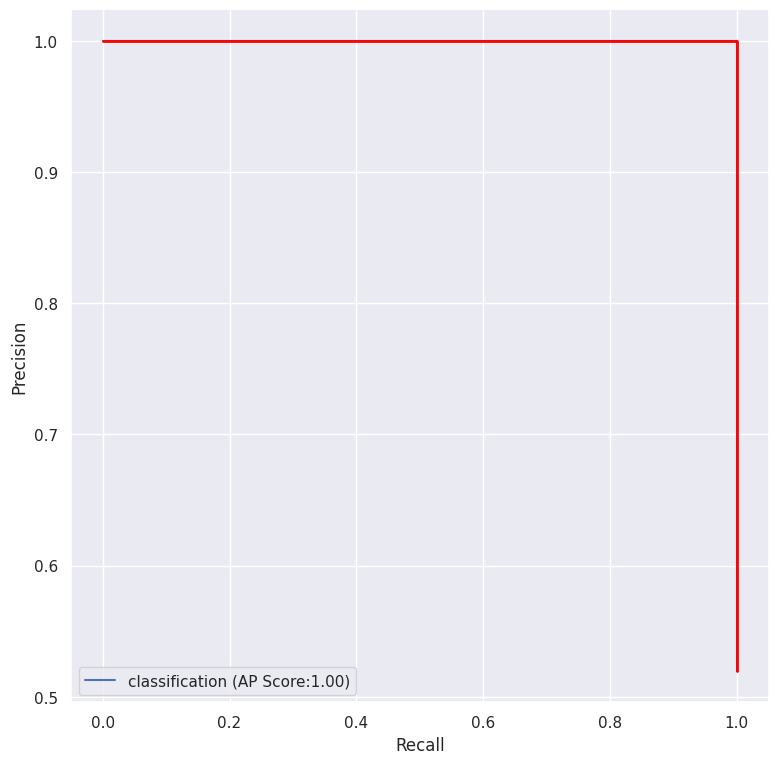

In [34]:
# Plotting the Precision/Recall Curve to check the tradeoff between precision (ratio of the retrieved items that are relevant) and recall (the ratio of relevant items that are retrieved)
plot_precision_recall_curve_helper(y_test, model.predict(x_test, verbose = True))

In [35]:
# Finding the threshold to optimize the model's performance 
# Using the threshold to make binary classification
# Calculating the F1 Score (a measure of the model's accuracy)
def calc_f1(prec,recall):
    # Using "if recall and prec else 0" to ensure division by 0 doesn't lead to an error
    return 2*(prec*recall)/(prec+recall) if recall and prec else 0

precision, recall, thresholds = precision_recall_curve(y_test, model.predict(x_test, verbose = True))
# Using a list comprehension to call F1 Score calculation function above while looping through the threshold list, which contains the probability that precision and recall aren't in sync anymore
f1score = [calc_f1(precision[i],recall[i]) for i in range(len(thresholds))]
# Finding the argmax (the index of the value that maximizes the F1 Score)
index_max = np.argmax(f1score)
# Finding the threshold of the index that maximizes the F1 Score
threshold = thresholds[index_max]
print(threshold)
# Printing the precision, recall, threshold, and F1 Score of the index that maximizes the F1 Score
print('Precision: '+ str(precision[index_max]))
print('Recall: '+ str(recall[index_max]))
print('Threshold: '+ str(thresholds[index_max]))
print('F1 Score: ' + str(f1score[index_max]))

4/4 [==============================] - 0s 4ms/step
0.676694
Precision: 1.0
Recall: 1.0
Threshold: 0.676694
F1 Score: 1.0


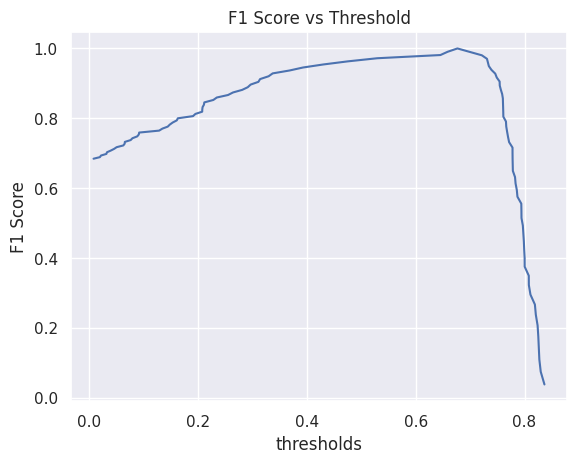

In [36]:
# Plotting the threshold (probability taht a prediction of Chronic Kidney Disease is true) and F1 Score
plt.figure()
plt.plot(thresholds, f1score)
plt.title("F1 Score vs Threshold")
plt.xlabel("thresholds")
plt.ylabel("F1 Score")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dd11fde9-14d3-433d-bb09-7a28c8f05766' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>